**Author**: CodeForAll  
**License**: MIT License

---


## What is a Step Response?

In control systems, the **step response** is the system's output when a **step input** is applied. A step input is a signal that changes from zero to a constant value at a specific time (usually at \( t = 0 \)). It is often used to model real-world systems that experience a sudden change, such as when a switch is turned on or an actuator is suddenly activated.

Mathematically, a step input is represented as:

$$
u(t) = \begin{cases}
0, & t < 0 \\
1, & t \geq 0
\end{cases}
$$

Where:
- \( u(t) \) is the step input that jumps from 0 to 1 at \( t = 0 \).

The **step response** of a system shows how the system reacts over time after the step input is applied. It provides valuable information about the system's stability, speed of response, and how it reaches its final value (steady-state).

### Why Step Response?

The step response is one of the most fundamental system tests in control systems. It provides insights into the following:
- **Stability**: If the system oscillates or returns to equilibrium.
- **Transient Behavior**: How quickly the system reacts and settles to its steady-state value.
- **Overshoot**: Whether the system exceeds the final value before stabilizing.
- **Settling Time**: How long it takes for the system to settle within a specific error band around its steady-state value.
  
The **step response** is particularly useful when analyzing systems that are subjected to abrupt changes in input, which happens often in practical applications like motors, actuators, or automated systems.

---

## Step Response vs Other Responses

- **Impulse Response**: Measures the system's response to an instantaneous force. It is useful for analyzing the system's immediate reaction.
  
- **Step Response**: Measures the system's reaction to a sustained change in input. It shows how the system adjusts over time to a new setpoint.
  
- **Ramp Response**: Analyzes how the system behaves when the input is a gradually increasing signal, often representing a continuous change in the system's input.

The **step response** is commonly used in system analysis because it helps engineers understand how the system will behave when it is suddenly disturbed. It is also used to calculate important system characteristics such as **settling time**, **overshoot**, and **steady-state error**.



# Mass-Spring-Damper System: Step Response Analysis

In this experiment, we will analyze the **step response** of a mass-spring-damper system. The step response shows how the system behaves when a sudden force is applied (a step input). The damping coefficient plays a crucial role in determining the system's behavior, so we will observe the response for different damping values: **underdamped**, **critically damped**, and **overdamped**.

---

## System Overview

The mass-spring-damper system is described by the following second-order differential equation:

$$
F(t) = m \cdot \ddot{x}(t) + c \cdot \dot{x}(t) + k \cdot x(t)
$$

Where:
- \( F(t) \) is the applied force (in Newtons, N),
- \( m \) is the mass of the object (in kg),
- \( c \) is the damping coefficient (in Ns/m),
- \( k \) is the spring constant (in N/m),
- \( x(t) \) is the displacement of the mass from its equilibrium position (in meters).

---

## Transfer Function

We will model the system using its **transfer function**, which relates the input force to the displacement of the mass. The transfer function \( G(s) \) in the Laplace domain is given by:

$$
G(s) = \frac{X(s)}{F(s)} = \frac{1}{m \cdot s^2 + c \cdot s + k}
$$

Where:
- \( s \) is the Laplace variable,
- \( X(s) \) is the Laplace transform of the displacement \( x(t) \),
- \( F(s) \) is the Laplace transform of the input force \( F(t) \).

---

## Damping Scenarios

The system's behavior depends on the damping coefficient \( c \). There are three possible scenarios:
1. **Underdamped (c = 0.5 Ns/m)**: The system oscillates before eventually settling.
2. **Critically Damped (c = 1.0 Ns/m)**: The system returns to equilibrium as quickly as possible without oscillating.
3. **Overdamped (c = 3.0 Ns/m)**: The system slowly returns to equilibrium without oscillating.

In this experiment, we will simulate the system's step response for these three damping values.

---

## Experiment Setup

We will use the following parameters for the system:
- Mass, \( m = 1 kg \),
- Spring constant, \( k = 2 N/m \),
- Time vector from 0 to 10 seconds, with 500 points.

We will plot the step response for each damping coefficient and compare how the system behaves.


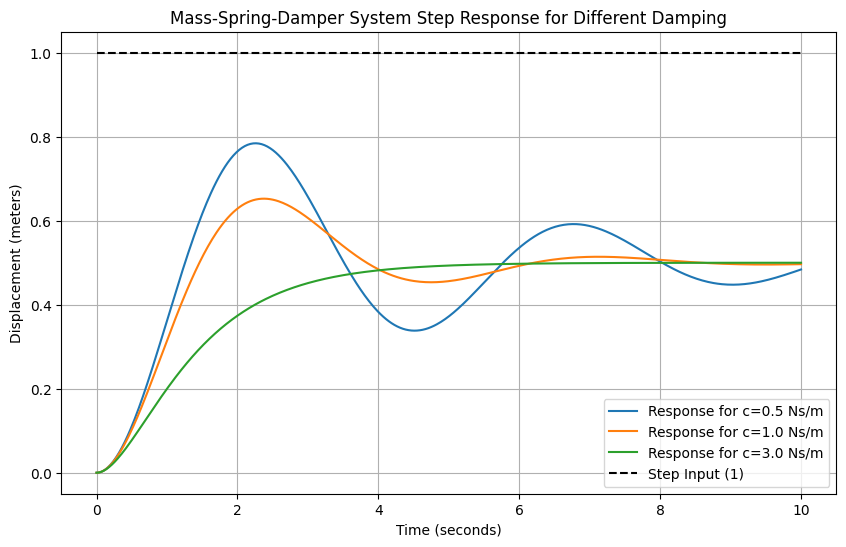

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# System parameters
m = 1  # mass (kg)
k = 2  # spring constant (N/m)

# Different damping coefficients for different system behaviors
damping_values = [0.5, 1.0, 3.0]  # Underdamped, Critically Damped, Overdamped

# Time vector (from 0 to 10 seconds, 500 points)
time = np.linspace(0, 10, 500)

# Plotting the step response for different damping values
plt.figure(figsize=(10, 6))

# Loop through each damping coefficient
for c in damping_values:
    # Create transfer function for each damping value
    system = ctrl.TransferFunction([1], [m, c, k])
    
    # Simulate step response
    time_response, response = ctrl.step_response(system, T=time)
    
    # Plot the response
    plt.plot(time_response, response, label=f'Response for c={c} Ns/m')

# Plotting the step input (which is a constant 1 over time)
plt.plot(time, np.ones_like(time), 'k--', label='Step Input (1)')

# Plotting the time-domain response
plt.title('Mass-Spring-Damper System Step Response for Different Damping')
plt.xlabel('Time (seconds)')
plt.ylabel('Displacement (meters)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


## Observations

The system's response varies with the damping coefficient:

- **Underdamped (c = 0.5)**: The system exhibits oscillations before settling at the final position. This behavior is typical of systems where the damping is insufficient to stop oscillations quickly.
  
- **Critically Damped (c = 1.0)**: The system returns to equilibrium without oscillations and does so in the shortest possible time. This is the ideal scenario for minimizing overshoot and settling time.
  
- **Overdamped (c = 3.0)**: The system slowly returns to equilibrium without oscillations. While it avoids overshoot, it takes longer to reach equilibrium.

These observations highlight the importance of tuning the damping coefficient in control systems, especially in applications that require fast responses without oscillations.

---

## Conclusion

By varying the damping coefficient \( c \), we can observe different behaviors in the mass-spring-damper system. These behaviors are crucial in understanding the system's response to external forces and in designing control systems to achieve desired performance.

This experiment demonstrates how damping influences system stability and response speed, and it can be applied to real-world systems like mechanical suspensions, vibration dampers, and automated control systems.
